# **Actividad 1: Regresión Lineal**
Diego Gonzalez Ramirez A01351560

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

### Definición del **DF** México

In [157]:
df = pd.read_csv("listings.csv")

In [158]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


El objetivo del estudio es obtener un modelo matemático de regresión que describa y prediga el comportamiento de nuestros datos, por lo que es importante que nuestra DF se reduzca a únicamente las variables que nos pueden ser útiles para dicho objetivo (variables numéricas). 

In [159]:
df = df.loc[:, ['room_type', 'number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
dfroom = df.loc[:,["room_type"]]
df.head(5)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,NaN,4001.00,363,NaN,NaN,NaN
1,Private room,27,100,500.00,363,4.96,4.93,4.93
2,Private room,144,67,599.00,323,4.73,4.70,4.91
3,Entire home/apt,58,79,18000.00,331,4.59,4.70,4.75
4,Entire home/apt,61,100,740.00,314,4.85,4.80,4.95


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    22948 non-null  object 
 1   number_of_reviews            22948 non-null  int64  
 2   host_acceptance_rate         20483 non-null  object 
 3   price                        22948 non-null  object 
 4   availability_365             22948 non-null  int64  
 5   review_scores_rating         18881 non-null  float64
 6   review_scores_cleanliness    18787 non-null  float64
 7   review_scores_communication  18787 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


In [161]:
# Al notar que tenemos dos columnas cómo "object", las transformamos a numéricas
df["host_acceptance_rate"] = pd.to_numeric(df["host_acceptance_rate"], downcast = "float")
df["price"] = pd.to_numeric(df["price"], downcast = "float")

### Tratamiento de **valores nulos** y **outliers**


*   Valores Nulos



In [162]:
valores_nulos = df.isnull().sum()
valores_nulos

room_type                         0
number_of_reviews                 0
host_acceptance_rate           2465
price                             0
availability_365                  0
review_scores_rating           4067
review_scores_cleanliness      4161
review_scores_communication    4161
dtype: int64

Cómo se puede observar, 4 de nuestras variables cuentan con una cantidad significante de valores nulos, por lo que eliminarlos no es una opción tan recomendada, porque estaríamos reduciendo basatnte nuestra cantidad de datos. Entonces procedemos a imputar estos valores nulos mediante la técnica de **imputar con el promedio**.

In [163]:
df = df.fillna(round(df.mean(),1))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,89.699997,4001.0,363,4.70,4.70,4.80
1,Private room,27,100.000000,500.0,363,4.96,4.93,4.93
2,Private room,144,67.000000,599.0,323,4.73,4.70,4.91
3,Entire home/apt,58,79.000000,18000.0,331,4.59,4.70,4.75
4,Entire home/apt,61,100.000000,740.0,314,4.85,4.80,4.95


In [164]:
# Corroboramos los valores nulos
valores_nulos = df.isnull().sum()
valores_nulos

room_type                      0
number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
dtype: int64



*   Outliers



In [165]:
# Aplicando la desviación estándar para encontrar los límites
y = df

LSuperior = y.mean() + 3*y.std()
LInferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n", LSuperior)
print("Límite inferior permitido:\n", LInferior)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Límite superior permitido:
 number_of_reviews                206.034299
host_acceptance_rate             154.731421
price                          36812.777344
availability_365                 613.333306
review_scores_rating               6.294646
review_scores_cleanliness          6.036125
review_scores_communication        6.060806
dtype: float64
Límite inferior permitido:
 number_of_reviews               -141.140888
host_acceptance_rate              24.661249
price                         -33738.884766
availability_365                -125.739877
review_scores_rating               3.112147
review_scores_cleanliness          3.442613
review_scores_communication        3.563244
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [166]:
df = df[(y<=LSuperior)&(y>=LInferior)]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,NaN,0.0,89.699997,4001.0,363,4.70,4.70,4.80
1,NaN,27.0,100.000000,500.0,363,4.96,4.93,4.93
2,NaN,144.0,67.000000,599.0,323,4.73,4.70,4.91
3,NaN,58.0,79.000000,18000.0,331,4.59,4.70,4.75
4,NaN,61.0,100.000000,740.0,314,4.85,4.80,4.95


In [167]:
valores_nulos = df.isnull().sum()
valores_nulos

room_type                      22948
number_of_reviews                547
host_acceptance_rate             904
price                             34
availability_365                   0
review_scores_rating             473
review_scores_cleanliness        386
review_scores_communication      365
dtype: int64

In [168]:
# Rescatamos la columna "room_type" que habíamos salvado anteriormente
df["room_type"] = dfroom["room_type"]

In [169]:
# Imputamos los nulos que resultaron outliers, usando mean
df = df.fillna(round(df.mean(),1))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0.0,89.699997,4001.0,363,4.70,4.70,4.80
1,Private room,27.0,100.000000,500.0,363,4.96,4.93,4.93
2,Private room,144.0,67.000000,599.0,323,4.73,4.70,4.91
3,Entire home/apt,58.0,79.000000,18000.0,331,4.59,4.70,4.75
4,Entire home/apt,61.0,100.000000,740.0,314,4.85,4.80,4.95


In [170]:
df.describe()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
count,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000
mean,26.055591,93.295525,1294.292603,243.796714,4.769010,4.784880,4.856861
std,38.266344,12.368427,1729.500244,123.178864,0.233494,0.229277,0.188714
min,0.000000,25.000000,0.000000,0.000000,3.130000,3.470000,3.570000
25%,1.000000,90.000000,500.000000,140.000000,4.700000,4.700000,4.800000
50%,10.000000,99.000000,899.000000,300.000000,4.800000,4.820000,4.900000
75%,33.000000,100.000000,1483.250000,353.000000,4.950000,4.970000,5.000000
max,206.000000,100.000000,35000.000000,365.000000,5.000000,5.000000,5.000000


¡Nuestra base de datos está lista para ser utilizada!

### Separamos el DF para tener un DF para cada **Tipo de cuarto**

In [171]:
# Filtro por room (Entire home)
entire_home = df[df["room_type"] == "Entire home/apt"]
entire_home.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0.0,89.699997,4001.0,363,4.70,4.7,4.80
3,Entire home/apt,58.0,79.000000,18000.0,331,4.59,4.7,4.75
4,Entire home/apt,61.0,100.000000,740.0,314,4.85,4.8,4.95


In [172]:
# Filtro por room (Private room)
private_room = df[df["room_type"] == "Private room"]
private_room.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
1,Private room,27.0,100.0,500.0,363,4.96,4.93,4.93
2,Private room,144.0,67.0,599.0,323,4.73,4.70,4.91
8,Private room,58.0,79.0,1198.0,175,4.91,4.91,4.95


In [173]:
# Filtro por room (Shared room)
shared_room = df[df["room_type"] == "Shared room"]
shared_room.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
138,Shared room,0.0,89.699997,2000.0,365,4.70,4.7,4.8
298,Shared room,0.0,89.699997,879.0,365,4.70,4.7,4.8
301,Shared room,106.0,97.000000,333.0,135,4.93,4.9,5.0


### Data Frame **Entire home/apt**

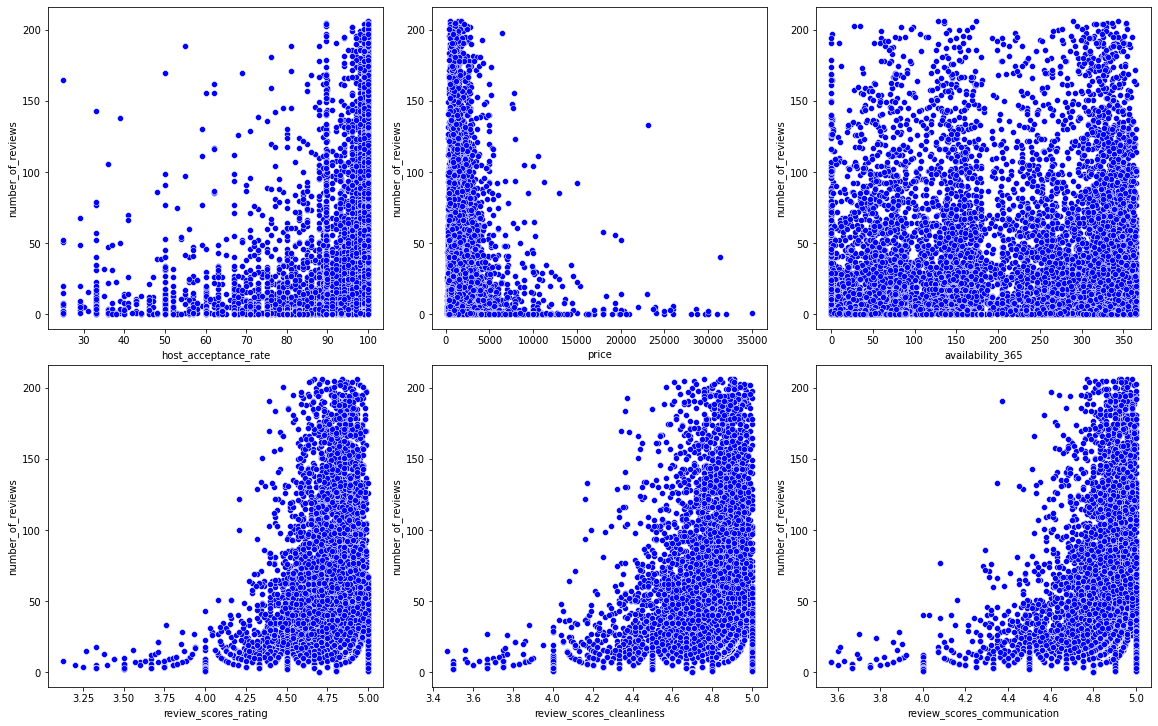

In [174]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = entire_home.loc[:,column_sels]
y = entire_home['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=entire_home, ax=axs[i], color='blue')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [175]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_eh = abs(entire_home.corr())
Corr_Factors_eh

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.142099,0.078239,0.072395,0.062771,0.078765,0.078364
host_acceptance_rate,0.142099,1.000000,0.021721,0.063998,0.017833,0.058865,0.003957
price,0.078239,0.021721,1.000000,0.035142,0.054824,0.045566,0.010395
availability_365,0.072395,0.063998,0.035142,1.000000,0.111222,0.054409,0.112415
review_scores_rating,0.062771,0.017833,0.054824,0.111222,1.000000,0.620093,0.596963
review_scores_cleanliness,0.078765,0.058865,0.045566,0.054409,0.620093,1.000000,0.458545
review_scores_communication,0.078364,0.003957,0.010395,0.112415,0.596963,0.458545,1.000000


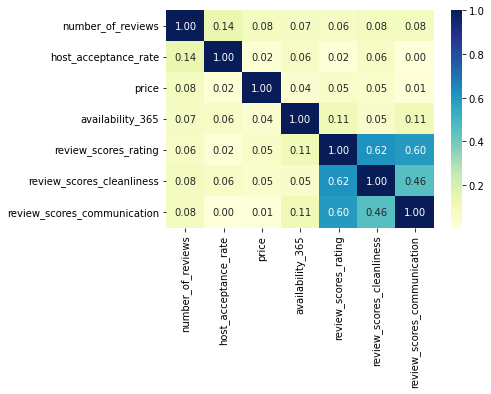

In [176]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_eh, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map

**Modelo matemático** que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

In [177]:
# La variable con mayor correlación es host_acceptance_rate
# Declaramos las variables dependientes e independientes
Vars_Indep = entire_home[["host_acceptance_rate"]]
Var_Dep = entire_home["number_of_reviews"]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X=Vars_Indep, y = Var_Dep)

LinearRegression()

In [178]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.53290296], dtype=float32),
 '_residues': 23574028.0,
 'rank_': 1,
 'singular_': array([1307.947], dtype=float32),
 'intercept_': -18.646019}

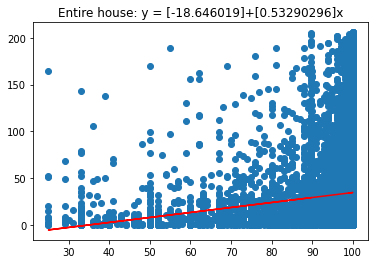

In [179]:
x = np.array(entire_home['host_acceptance_rate']).reshape(-1,1)
y = np.array(entire_home['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Entire house: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

In [180]:
model.score(Vars_Indep, Var_Dep) # usando la variable host_acceptance_rate

0.02019219070974765

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo



In [181]:
Var_Dep = entire_home["number_of_reviews"]
Vars_Indep1 = entire_home[["host_acceptance_rate"]]
Vars_Indep2 = entire_home[["price"]]
Vars_Indep3 = entire_home[["availability_365"]]
Vars_Indep4 = entire_home[["review_scores_rating"]]
Vars_Indep5 = entire_home[["review_scores_cleanliness"]]
Vars_Indep6 = entire_home[["review_scores_communication"]]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

model1.fit(X=Vars_Indep1, y = Var_Dep)
model2.fit(X=Vars_Indep2, y = Var_Dep)
model3.fit(X=Vars_Indep3, y = Var_Dep)
model4.fit(X=Vars_Indep4, y = Var_Dep)
model5.fit(X=Vars_Indep5, y = Var_Dep)
model6.fit(X=Vars_Indep6, y = Var_Dep)

LinearRegression()


*   Coefeicientes de **Determinación**

In [182]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y = Var_Dep)
coef_Deter2 = model2.score(X=Vars_Indep2, y = Var_Dep)
coef_Deter3 = model3.score(X=Vars_Indep3, y = Var_Dep)
coef_Deter4 = model4.score(X=Vars_Indep4, y = Var_Dep)
coef_Deter5 = model5.score(X=Vars_Indep5, y = Var_Dep)
coef_Deter6 = model6.score(X=Vars_Indep6, y = Var_Dep)

print("Coef. de determinación Number of reviews vs host_acceptance_rate:", coef_Deter1)
print("Coef. de determinación Number of reviews vs price:", coef_Deter2)
print("Coef. de determinación Number of reviews vs availability_365:", coef_Deter3)
print("Coef. de determinación Number of reviews vs review_scores_rating:", coef_Deter4)
print("Coef. de determinación Number of reviews vs review_scores_cleanliness:", coef_Deter5)
print("Coef. de determinación Number of reviews vs review_scores_communication:", coef_Deter6)

Coef. de determinación Number of reviews vs host_acceptance_rate: 0.02019219070974765
Coef. de determinación Number of reviews vs price: 0.006121316211259775
Coef. de determinación Number of reviews vs availability_365: 0.005240970281225721
Coef. de determinación Number of reviews vs review_scores_rating: 0.0039401539500873994
Coef. de determinación Number of reviews vs review_scores_cleanliness: 0.006203923721720184
Coef. de determinación Number of reviews vs review_scores_communication: 0.006140858129062621




*   Coeficientes de **Correlación**



In [183]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_Correl = np.sqrt(abs(coef_Deter1))
coef_Corre2 = np.sqrt(abs(coef_Deter2))
coef_Corre3 = np.sqrt(abs(coef_Deter3))
coef_Corre4 = np.sqrt(abs(coef_Deter4))
coef_Corre5 = np.sqrt(abs(coef_Deter5))
coef_Corre6 = np.sqrt(abs(coef_Deter6))

print("Coef. de correlación Number of reviews vs host_acceptance_rate:", coef_Correl)
print("Coef. de correlación Number of reviews vs price:", coef_Corre2)
print("Coef. de correlación Number of reviews vs availability_365:", coef_Corre3)
print("Coef. de correlación Number of reviews vs review_scores_rating:", coef_Corre4)
print("Coef. de correlación Number of reviews vs review_scores_cleanliness:", coef_Corre5)
print("Coef. de correlación Number of reviews vs review_scores_communication:", coef_Corre6)

Coef. de correlación Number of reviews vs host_acceptance_rate: 0.14209922839251327
Coef. de correlación Number of reviews vs price: 0.07823884080979072
Coef. de correlación Number of reviews vs availability_365: 0.07239454593562777
Coef. de correlación Number of reviews vs review_scores_rating: 0.0627706456083367
Coef. de correlación Number of reviews vs review_scores_cleanliness: 0.07876499045718335
Coef. de correlación Number of reviews vs review_scores_communication: 0.07836362758998987


### Data Frame **Private room**

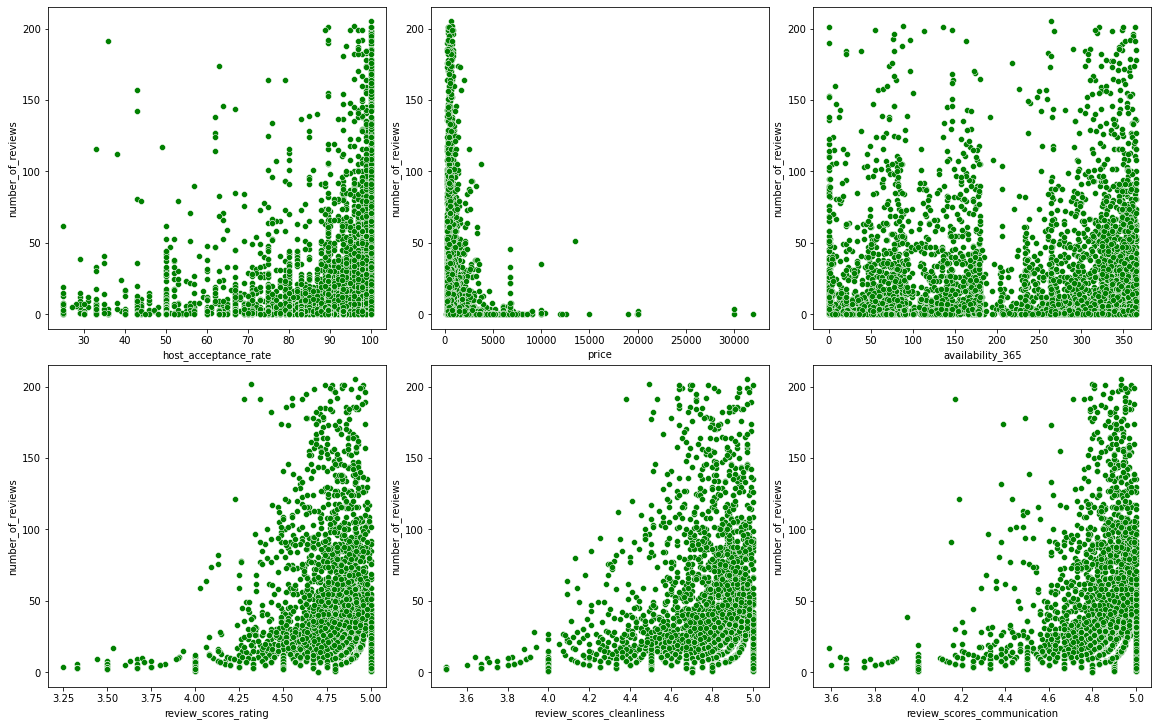

In [184]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = private_room.loc[:,column_sels]
y = private_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=private_room, ax=axs[i], color='green')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [185]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_pr = abs(private_room.corr())
Corr_Factors_pr

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.129216,0.083665,0.078778,0.060507,0.075035,0.056171
host_acceptance_rate,0.129216,1.000000,0.016589,0.022675,0.023765,0.007089,0.014809
price,0.083665,0.016589,1.000000,0.089096,0.025118,0.002953,0.030506
availability_365,0.078778,0.022675,0.089096,1.000000,0.122842,0.074787,0.105842
review_scores_rating,0.060507,0.023765,0.025118,0.122842,1.000000,0.583250,0.604753
review_scores_cleanliness,0.075035,0.007089,0.002953,0.074787,0.583250,1.000000,0.441308
review_scores_communication,0.056171,0.014809,0.030506,0.105842,0.604753,0.441308,1.000000


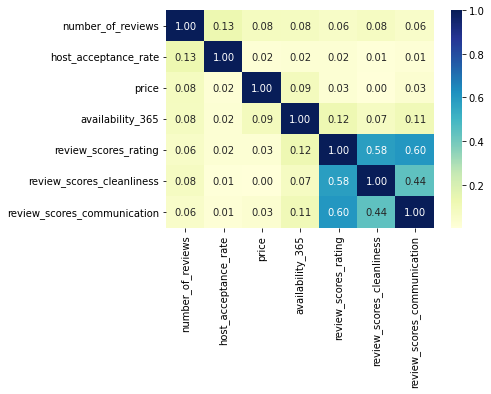

In [186]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_pr, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map

**Modelo matemático** que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

In [187]:
# La variable con mayor correlación es host_acceptance_rate
# Declaramos las variables dependientes e independientes
Vars_Indep = private_room[["host_acceptance_rate"]]
Var_Dep = private_room["number_of_reviews"]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X=Vars_Indep, y = Var_Dep)

LinearRegression()

In [188]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.28905356], dtype=float32),
 '_residues': 7957545.0,
 'rank_': 1,
 'singular_': array([1271.6948], dtype=float32),
 'intercept_': -9.005014}

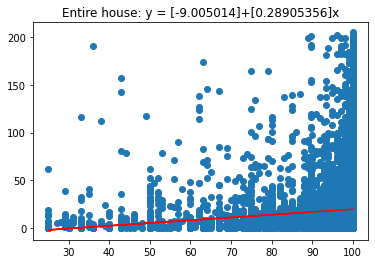

In [189]:
x = np.array(private_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(private_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Entire house: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

In [190]:
model.score(Vars_Indep, Var_Dep) # usando la variable host_acceptance_rate

0.016696683560841863

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo



In [191]:
Var_Dep = private_room["number_of_reviews"]
Vars_Indep1 = private_room[["host_acceptance_rate"]]
Vars_Indep2 = private_room[["price"]]
Vars_Indep3 = private_room[["availability_365"]]
Vars_Indep4 = private_room[["review_scores_rating"]]
Vars_Indep5 = private_room[["review_scores_cleanliness"]]
Vars_Indep6 = private_room[["review_scores_communication"]]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

model1.fit(X=Vars_Indep1, y = Var_Dep)
model2.fit(X=Vars_Indep2, y = Var_Dep)
model3.fit(X=Vars_Indep3, y = Var_Dep)
model4.fit(X=Vars_Indep4, y = Var_Dep)
model5.fit(X=Vars_Indep5, y = Var_Dep)
model6.fit(X=Vars_Indep6, y = Var_Dep)

LinearRegression()


*   Coefeicientes de **Determinación**

In [192]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y = Var_Dep)
coef_Deter2 = model2.score(X=Vars_Indep2, y = Var_Dep)
coef_Deter3 = model3.score(X=Vars_Indep3, y = Var_Dep)
coef_Deter4 = model4.score(X=Vars_Indep4, y = Var_Dep)
coef_Deter5 = model5.score(X=Vars_Indep5, y = Var_Dep)
coef_Deter6 = model6.score(X=Vars_Indep6, y = Var_Dep)

print("Coef. de determinación Number of reviews vs host_acceptance_rate:", coef_Deter1)
print("Coef. de determinación Number of reviews vs price:", coef_Deter2)
print("Coef. de determinación Number of reviews vs availability_365:", coef_Deter3)
print("Coef. de determinación Number of reviews vs review_scores_rating:", coef_Deter4)
print("Coef. de determinación Number of reviews vs review_scores_cleanliness:", coef_Deter5)
print("Coef. de determinación Number of reviews vs review_scores_communication:", coef_Deter6)

Coef. de determinación Number of reviews vs host_acceptance_rate: 0.016696683560841863
Coef. de determinación Number of reviews vs price: 0.006999882724173956
Coef. de determinación Number of reviews vs availability_365: 0.006205949129404198
Coef. de determinación Number of reviews vs review_scores_rating: 0.003661087075628844
Coef. de determinación Number of reviews vs review_scores_cleanliness: 0.005630272180258911
Coef. de determinación Number of reviews vs review_scores_communication: 0.0031552342954633827




*   Coeficientes de **Correlación**



In [193]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_Correl = np.sqrt(abs(coef_Deter1))
coef_Corre2 = np.sqrt(abs(coef_Deter2))
coef_Corre3 = np.sqrt(abs(coef_Deter3))
coef_Corre4 = np.sqrt(abs(coef_Deter4))
coef_Corre5 = np.sqrt(abs(coef_Deter5))
coef_Corre6 = np.sqrt(abs(coef_Deter6))

print("Coef. de correlación Number of reviews vs host_acceptance_rate:", coef_Correl)
print("Coef. de correlación Number of reviews vs price:", coef_Corre2)
print("Coef. de correlación Number of reviews vs availability_365:", coef_Corre3)
print("Coef. de correlación Number of reviews vs review_scores_rating:", coef_Corre4)
print("Coef. de correlación Number of reviews vs review_scores_cleanliness:", coef_Corre5)
print("Coef. de correlación Number of reviews vs review_scores_communication:", coef_Corre6)

Coef. de correlación Number of reviews vs host_acceptance_rate: 0.12921564750772974
Coef. de correlación Number of reviews vs price: 0.0836653017933597
Coef. de correlación Number of reviews vs availability_365: 0.07877784669184731
Coef. de correlación Number of reviews vs review_scores_rating: 0.060506917584924484
Coef. de correlación Number of reviews vs review_scores_cleanliness: 0.07503513963643241
Coef. de correlación Number of reviews vs review_scores_communication: 0.056171472256505636


### Data Frame **Shared room**

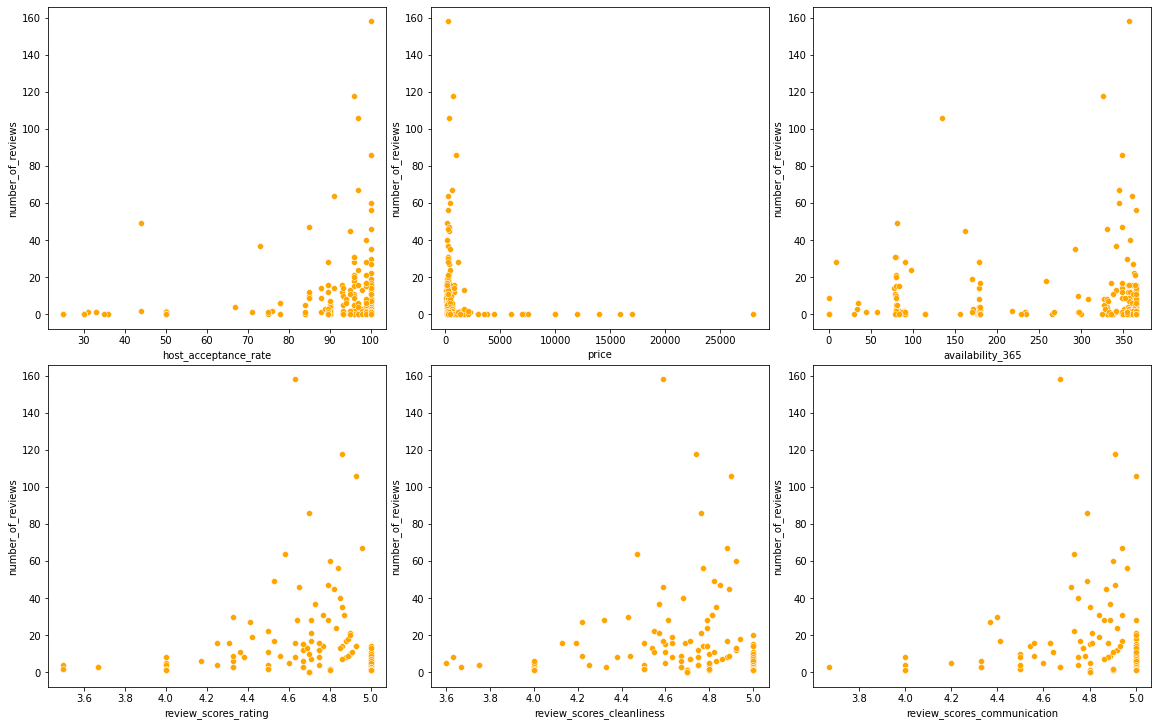

In [194]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared_room.loc[:,column_sels]
y = shared_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=shared_room, ax=axs[i], color='orange')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [195]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_sr = abs(shared_room.corr())
Corr_Factors_sr

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.121145,0.074527,0.046653,0.006506,0.000990,0.009528
host_acceptance_rate,0.121145,1.000000,0.033601,0.031627,0.035289,0.043861,0.155177
price,0.074527,0.033601,1.000000,0.047409,0.028561,0.014774,0.041832
availability_365,0.046653,0.031627,0.047409,1.000000,0.033061,0.025401,0.015089
review_scores_rating,0.006506,0.035289,0.028561,0.033061,1.000000,0.457989,0.596295
review_scores_cleanliness,0.000990,0.043861,0.014774,0.025401,0.457989,1.000000,0.480656
review_scores_communication,0.009528,0.155177,0.041832,0.015089,0.596295,0.480656,1.000000


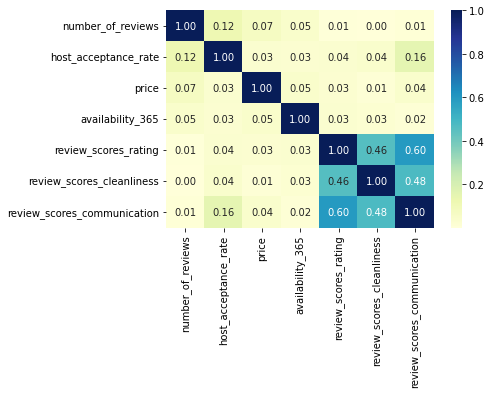

In [196]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_sr, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map

**Modelo matemático** que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

In [197]:
# La variable con mayor correlación es host_acceptance_rate
# Declaramos las variables dependientes e independientes
Vars_Indep = shared_room[["host_acceptance_rate"]]
Var_Dep = shared_room["number_of_reviews"]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X=Vars_Indep, y = Var_Dep)

LinearRegression()

In [198]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.12325234], dtype=float32),
 '_residues': 87051.28,
 'rank_': 1,
 'singular_': array([292.15268], dtype=float32),
 'intercept_': -4.757317}

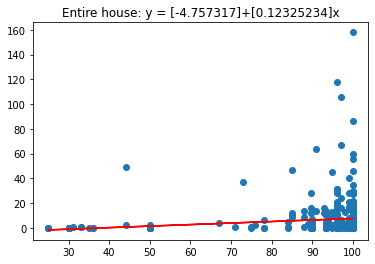

In [199]:
x = np.array(shared_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(shared_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Entire house: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

In [200]:
model.score(Vars_Indep, Var_Dep) # usando la variable host_acceptance_rate

0.014676208446887662

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo



In [201]:
Var_Dep = shared_room["number_of_reviews"]
Vars_Indep1 = shared_room[["host_acceptance_rate"]]
Vars_Indep2 = shared_room[["price"]]
Vars_Indep3 = shared_room[["availability_365"]]
Vars_Indep4 = shared_room[["review_scores_rating"]]
Vars_Indep5 = shared_room[["review_scores_cleanliness"]]
Vars_Indep6 = shared_room[["review_scores_communication"]]

# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

model1.fit(X=Vars_Indep1, y = Var_Dep)
model2.fit(X=Vars_Indep2, y = Var_Dep)
model3.fit(X=Vars_Indep3, y = Var_Dep)
model4.fit(X=Vars_Indep4, y = Var_Dep)
model5.fit(X=Vars_Indep5, y = Var_Dep)
model6.fit(X=Vars_Indep6, y = Var_Dep)

LinearRegression()


*   Coefeicientes de **Determinación**

In [202]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y = Var_Dep)
coef_Deter2 = model2.score(X=Vars_Indep2, y = Var_Dep)
coef_Deter3 = model3.score(X=Vars_Indep3, y = Var_Dep)
coef_Deter4 = model4.score(X=Vars_Indep4, y = Var_Dep)
coef_Deter5 = model5.score(X=Vars_Indep5, y = Var_Dep)
coef_Deter6 = model6.score(X=Vars_Indep6, y = Var_Dep)

print("Coef. de determinación Number of reviews vs host_acceptance_rate:", coef_Deter1)
print("Coef. de determinación Number of reviews vs price:", coef_Deter2)
print("Coef. de determinación Number of reviews vs availability_365:", coef_Deter3)
print("Coef. de determinación Number of reviews vs review_scores_rating:", coef_Deter4)
print("Coef. de determinación Number of reviews vs review_scores_cleanliness:", coef_Deter5)
print("Coef. de determinación Number of reviews vs review_scores_communication:", coef_Deter6)

Coef. de determinación Number of reviews vs host_acceptance_rate: 0.014676208446887662
Coef. de determinación Number of reviews vs price: 0.005554281201574085
Coef. de determinación Number of reviews vs availability_365: 0.002176537351238017
Coef. de determinación Number of reviews vs review_scores_rating: 4.2328368870636623e-05
Coef. de determinación Number of reviews vs review_scores_cleanliness: 9.80678039552707e-07
Coef. de determinación Number of reviews vs review_scores_communication: 9.078490180292054e-05




*   Coeficientes de **Correlación**



In [203]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_Correl = np.sqrt(abs(coef_Deter1))
coef_Corre2 = np.sqrt(abs(coef_Deter2))
coef_Corre3 = np.sqrt(abs(coef_Deter3))
coef_Corre4 = np.sqrt(abs(coef_Deter4))
coef_Corre5 = np.sqrt(abs(coef_Deter5))
coef_Corre6 = np.sqrt(abs(coef_Deter6))

print("Coef. de correlación Number of reviews vs host_acceptance_rate:", coef_Correl)
print("Coef. de correlación Number of reviews vs price:", coef_Corre2)
print("Coef. de correlación Number of reviews vs availability_365:", coef_Corre3)
print("Coef. de correlación Number of reviews vs review_scores_rating:", coef_Corre4)
print("Coef. de correlación Number of reviews vs review_scores_cleanliness:", coef_Corre5)
print("Coef. de correlación Number of reviews vs review_scores_communication:", coef_Corre6)

Coef. de correlación Number of reviews vs host_acceptance_rate: 0.12114540208727553
Coef. de correlación Number of reviews vs price: 0.07452705013331794
Coef. de correlación Number of reviews vs availability_365: 0.04665337448929088
Coef. de correlación Number of reviews vs review_scores_rating: 0.006506025581769305
Coef. de correlación Number of reviews vs review_scores_cleanliness: 0.0009902918961360368
Coef. de correlación Number of reviews vs review_scores_communication: 0.009528111135105453


### Definición del **DF** Barcelona

In [204]:
dfBar = pd.read_csv("listingsBar.csv.gz")

In [205]:
dfBar["host_acceptance_rate"] = dfBar["host_acceptance_rate"].str.replace("%","")
dfBar["price"] = dfBar["price"].str.replace("$","")
dfBar["price"] = dfBar["price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


El objetivo del estudio es obtener un modelo matemático de regresión que describa y prediga el comportamiento de nuestros datos, por lo que es importante que nuestra DF se reduzca a únicamente las variables que nos pueden ser útiles para dicho objetivo (variables numéricas). 

In [206]:
dfBar = dfBar.loc[:, ['room_type', 'number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
dfroomBar = dfBar.loc[:,["room_type"]]
dfBar.head(5)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,9,100,59.00,351,4.89,5.00,4.89
1,Entire home/apt,54,100,110.00,151,4.83,4.70,4.98
2,Entire home/apt,145,97,86.00,218,4.94,4.94,4.99
3,Entire home/apt,30,93,180.00,60,4.38,4.72,4.79
4,Entire home/apt,10,100,110.00,106,4.70,4.90,4.50


In [207]:
dfBar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    16920 non-null  object 
 1   number_of_reviews            16920 non-null  int64  
 2   host_acceptance_rate         14373 non-null  object 
 3   price                        16920 non-null  object 
 4   availability_365             16920 non-null  int64  
 5   review_scores_rating         13306 non-null  float64
 6   review_scores_cleanliness    13206 non-null  float64
 7   review_scores_communication  13207 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ MB


In [208]:
# Al notar que tenemos dos columnas cómo "object", las transformamos a numéricas
dfBar["host_acceptance_rate"] = pd.to_numeric(dfBar["host_acceptance_rate"], downcast = "float")
dfBar["price"] = pd.to_numeric(dfBar["price"], downcast = "float")

### Tratamiento de **valores nulos** y **outliers**


*   Valores Nulos



In [209]:
valores_nulos = dfBar.isnull().sum()
valores_nulos

room_type                         0
number_of_reviews                 0
host_acceptance_rate           2547
price                             0
availability_365                  0
review_scores_rating           3614
review_scores_cleanliness      3714
review_scores_communication    3713
dtype: int64

Cómo se puede observar, 4 de nuestras variables cuentan con una cantidad significante de valores nulos, por lo que eliminarlos no es una opción tan recomendada, porque estaríamos reduciendo basatnte nuestra cantidad de datos. Entonces procedemos a imputar estos valores nulos mediante la técnica de **imputar con el promedio**.

In [210]:
dfBar = dfBar.fillna(round(dfBar.mean(),1))
dfBar.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,9,100.0,59.0,351,4.89,5.00,4.89
1,Entire home/apt,54,100.0,110.0,151,4.83,4.70,4.98
2,Entire home/apt,145,97.0,86.0,218,4.94,4.94,4.99
3,Entire home/apt,30,93.0,180.0,60,4.38,4.72,4.79
4,Entire home/apt,10,100.0,110.0,106,4.70,4.90,4.50


In [211]:
# Corroboramos los valores nulos
valores_nulos = dfBar.isnull().sum()
valores_nulos

room_type                      0
number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
dtype: int64



*   Outliers



In [212]:
# Aplicando la desviación estándar para encontrar los límites
y = dfBar

LSuperior = y.mean() + 3*y.std()
LInferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n", LSuperior)
print("Límite inferior permitido:\n", LInferior)

Límite superior permitido:
 number_of_reviews               273.045000
host_acceptance_rate            149.663528
price                          2955.552292
availability_365                567.840498
review_scores_rating              6.234122
review_scores_cleanliness         6.005387
review_scores_communication       5.988342
dtype: float64
Límite inferior permitido:
 number_of_reviews              -190.986726
host_acceptance_rate             26.693375
price                         -2609.722733
availability_365               -226.210475
review_scores_rating              2.806863
review_scores_cleanliness         3.163560
review_scores_communication       3.427894
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [213]:
dfBar = dfBar[(y<=LSuperior)&(y>=LInferior)]
dfBar.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,NaN,9.0,100.0,59.0,351,4.89,5.00,4.89
1,NaN,54.0,100.0,110.0,151,4.83,4.70,4.98
2,NaN,145.0,97.0,86.0,218,4.94,4.94,4.99
3,NaN,30.0,93.0,180.0,60,4.38,4.72,4.79
4,NaN,10.0,100.0,110.0,106,4.70,4.90,4.50


In [214]:
valores_nulos = dfBar.isnull().sum()
valores_nulos

room_type                      16920
number_of_reviews                410
host_acceptance_rate             551
price                             50
availability_365                   0
review_scores_rating             265
review_scores_cleanliness        379
review_scores_communication      327
dtype: int64

In [215]:
# Rescatamos la columna "room_type" que habíamos salvado anteriormente
dfBar["room_type"] = dfroomBar["room_type"]

In [216]:
# Imputamos los nulos que resultaron outliers, usando mean
dfBar = dfBar.fillna(round(dfBar.mean(),1))
dfBar.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,9.0,100.0,59.0,351,4.89,5.00,4.89
1,Entire home/apt,54.0,100.0,110.0,151,4.83,4.70,4.98
2,Entire home/apt,145.0,97.0,86.0,218,4.94,4.94,4.99
3,Entire home/apt,30.0,93.0,180.0,60,4.38,4.72,4.79
4,Entire home/apt,10.0,100.0,110.0,106,4.70,4.90,4.50


In [217]:
dfBar.describe()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
count,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000
mean,32.627128,90.976677,146.855606,170.815012,4.576406,4.634691,4.753829
std,53.293531,13.624962,165.996002,132.341829,0.345070,0.309091,0.255416
min,0.000000,27.000000,0.000000,0.000000,2.830000,3.200000,3.430000
25%,1.000000,88.199997,50.000000,39.000000,4.500000,4.580000,4.700000
50%,7.000000,96.000000,100.000000,164.000000,4.560000,4.600000,4.780000
75%,37.000000,100.000000,190.000000,308.000000,4.830000,4.870000,4.960000
max,273.000000,100.000000,2400.000000,365.000000,5.000000,5.000000,5.000000


¡Nuestra base de datos está lista para ser utilizada!

### Separamos el DF para tener un DF para cada **Tipo de cuarto**

In [218]:
# Filtro por room (Entire home)
entire_homeBar = dfBar[dfBar["room_type"] == "Entire home/apt"]
entire_homeBar.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
1,Entire home/apt,54.0,100.0,110.0,151,4.83,4.70,4.98
2,Entire home/apt,145.0,97.0,86.0,218,4.94,4.94,4.99
3,Entire home/apt,30.0,93.0,180.0,60,4.38,4.72,4.79


In [219]:
# Filtro por room (Private room)
private_roomBar = dfBar[dfBar["room_type"] == "Private room"]
private_roomBar.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,9.0,100.000000,59.0,351,4.89,5.00,4.89
12,Private room,101.0,61.000000,39.0,231,4.78,4.72,4.91
16,Private room,0.0,88.199997,36.0,340,4.50,4.60,4.70


In [220]:
# Filtro por room (Shared room)
shared_roomBar = dfBar[dfBar["room_type"] == "Shared room"]
shared_roomBar.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
1113,Shared room,4.0,88.199997,140.0,0,5.00,5.00,5.00
1172,Shared room,1.0,44.000000,25.0,334,4.60,4.60,4.70
1281,Shared room,131.0,58.000000,41.0,0,4.45,4.61,4.68


### Data Frame **Entire home/apt** Barcelona

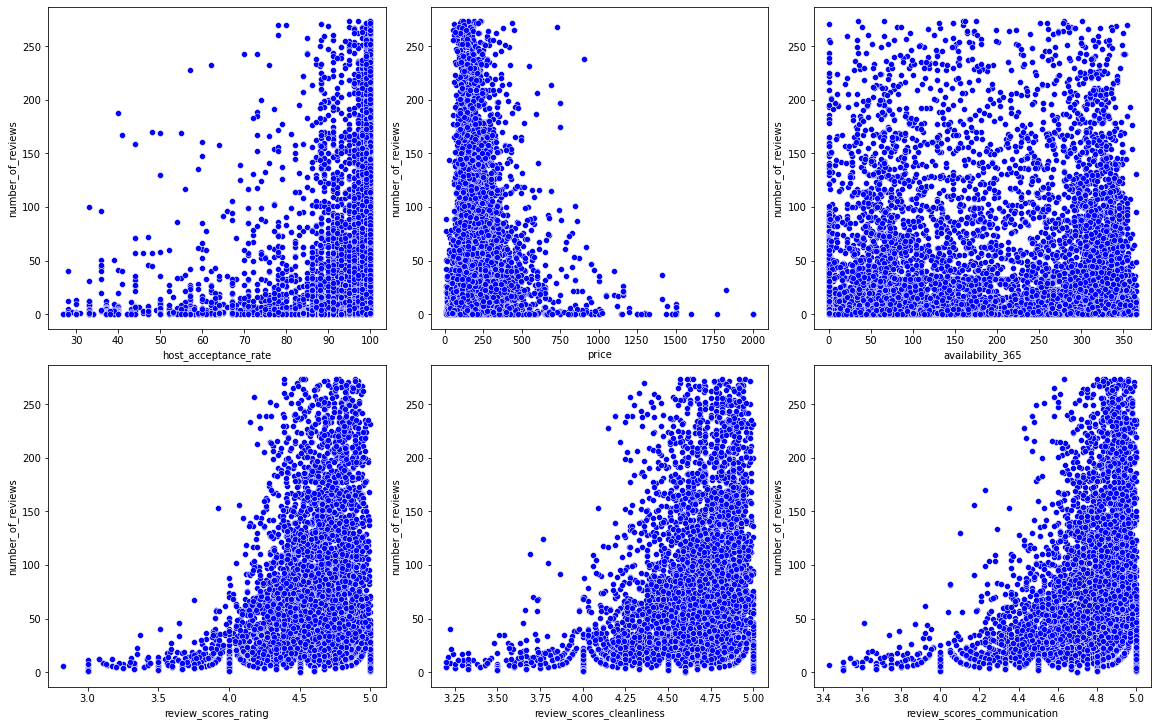

In [221]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = entire_homeBar.loc[:,column_sels]
y = entire_homeBar['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=entire_homeBar, ax=axs[i], color='blue')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [222]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_ehBar = abs(entire_homeBar.corr())
Corr_Factors_ehBar

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.191206,0.071877,0.013527,0.144195,0.136593,0.142342
host_acceptance_rate,0.191206,1.000000,0.114852,0.028699,0.019289,0.030771,0.009164
price,0.071877,0.114852,1.000000,0.142423,0.003505,0.029014,0.044632
availability_365,0.013527,0.028699,0.142423,1.000000,0.048062,0.036301,0.027818
review_scores_rating,0.144195,0.019289,0.003505,0.048062,1.000000,0.644683,0.596313
review_scores_cleanliness,0.136593,0.030771,0.029014,0.036301,0.644683,1.000000,0.482879
review_scores_communication,0.142342,0.009164,0.044632,0.027818,0.596313,0.482879,1.000000


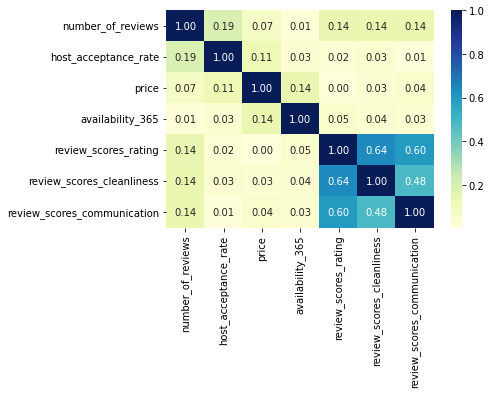

In [223]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_ehBar, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

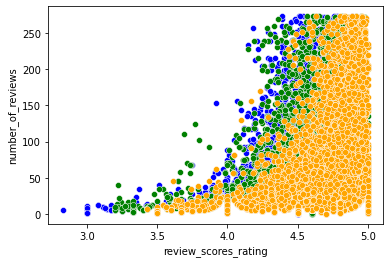

In [224]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = entire_homeBar)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = entire_homeBar)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = entire_homeBar)

In [225]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepBar = entire_homeBar[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepBar = entire_homeBar["number_of_reviews"]

In [226]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [227]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [228]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepBar, y = Var_DepBar)

LinearRegression()

In [229]:
model.score(Vars_IndepBar, Var_DepBar)

0.02787533838213274

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [230]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterBar = model.score(X=Vars_IndepBar, y = Var_DepBar)
coef_DeterBar

0.02787533838213274



*   Coeficientes de **Correlación**



In [231]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelBar = np.sqrt(coef_DeterBar)
coef_CorrelBar

0.1669590919421064

### Data Frame **Private room** Barcelona

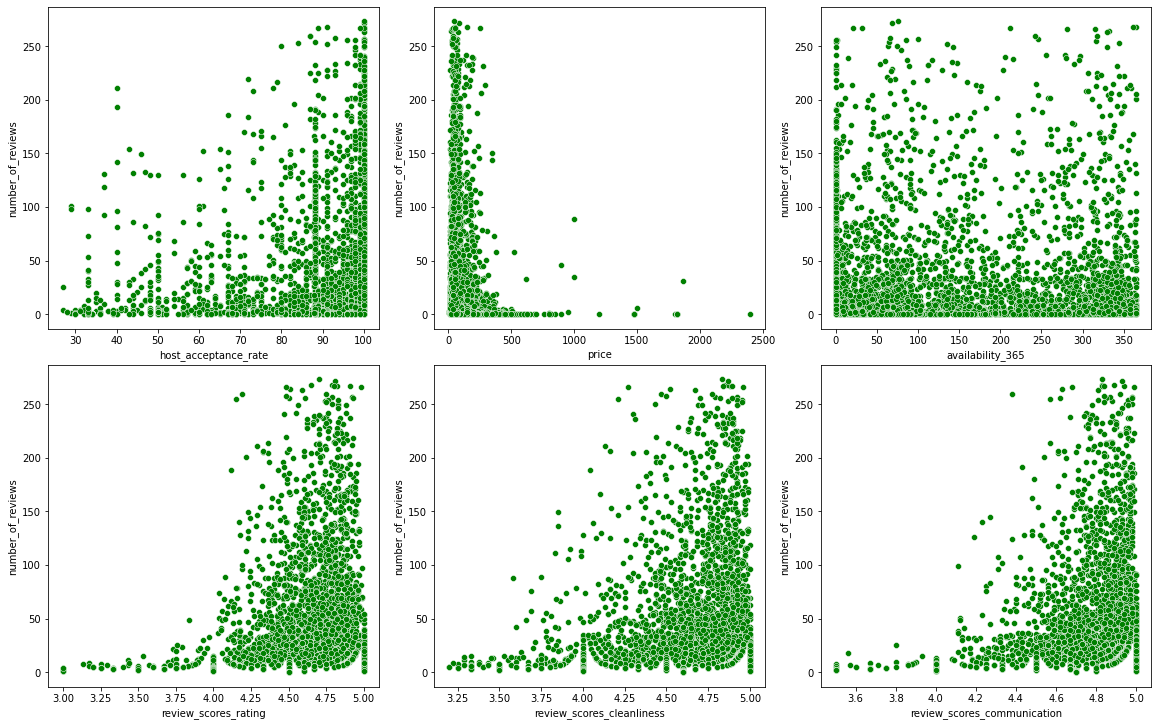

In [232]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = private_roomBar.loc[:,column_sels]
y = private_roomBar['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=private_roomBar, ax=axs[i], color='green')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [233]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_prBar = abs(private_roomBar.corr())
Corr_Factors_prBar

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.102170,0.069298,0.025215,0.133523,0.093980,0.101663
host_acceptance_rate,0.102170,1.000000,0.142680,0.049566,0.015997,0.009183,0.029147
price,0.069298,0.142680,1.000000,0.268219,0.045699,0.002469,0.065707
availability_365,0.025215,0.049566,0.268219,1.000000,0.036671,0.015547,0.095967
review_scores_rating,0.133523,0.015997,0.045699,0.036671,1.000000,0.603432,0.568705
review_scores_cleanliness,0.093980,0.009183,0.002469,0.015547,0.603432,1.000000,0.415972
review_scores_communication,0.101663,0.029147,0.065707,0.095967,0.568705,0.415972,1.000000


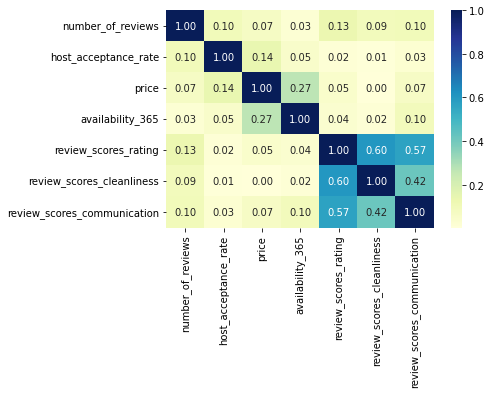

In [234]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_prBar, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

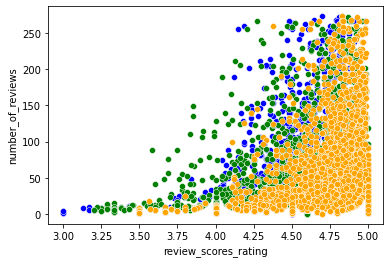

In [235]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = private_roomBar)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = private_roomBar)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = private_roomBar)

In [236]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepBar = private_roomBar[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepBar = private_roomBar["number_of_reviews"]

In [237]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [238]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [239]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepBar, y = Var_DepBar)

LinearRegression()

In [240]:
model.score(Vars_IndepBar, Var_DepBar)

0.018986990529672676

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [241]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterBar = model.score(X=Vars_IndepBar, y = Var_DepBar)
coef_DeterBar

0.018986990529672676



*   Coeficientes de **Correlación**



In [242]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelBar = np.sqrt(coef_DeterBar)
coef_CorrelBar

0.13779328913148375

### Data Frame **Shared room** Barcelona

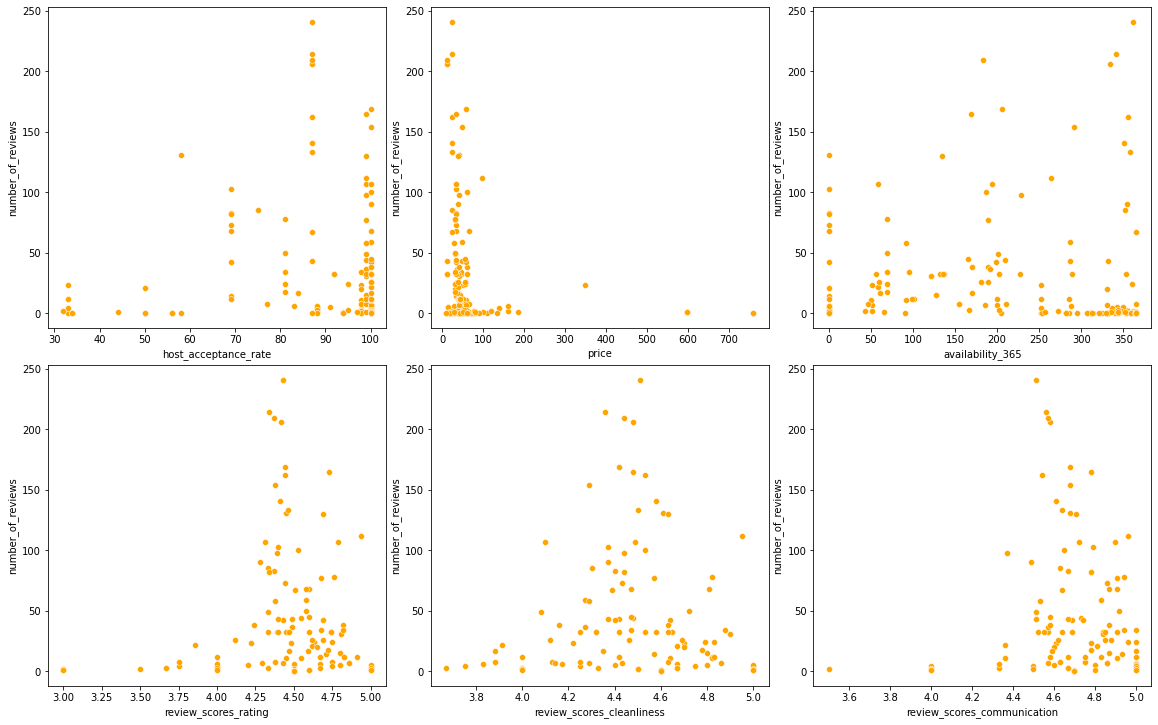

In [243]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared_roomBar.loc[:,column_sels]
y = shared_roomBar['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=shared_roomBar, ax=axs[i], color='orange')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [244]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_srBar = abs(shared_roomBar.corr())
Corr_Factors_srBar

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.048971,0.141175,0.056055,0.027643,0.110381,0.074712
host_acceptance_rate,0.048971,1.000000,0.001332,0.035705,0.149124,0.042930,0.126196
price,0.141175,0.001332,1.000000,0.168891,0.041627,0.039204,0.106952
availability_365,0.056055,0.035705,0.168891,1.000000,0.059220,0.079557,0.092909
review_scores_rating,0.027643,0.149124,0.041627,0.059220,1.000000,0.545571,0.518255
review_scores_cleanliness,0.110381,0.042930,0.039204,0.079557,0.545571,1.000000,0.437022
review_scores_communication,0.074712,0.126196,0.106952,0.092909,0.518255,0.437022,1.000000


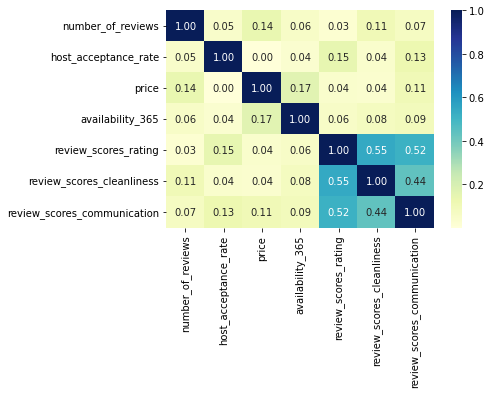

In [245]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_srBar, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

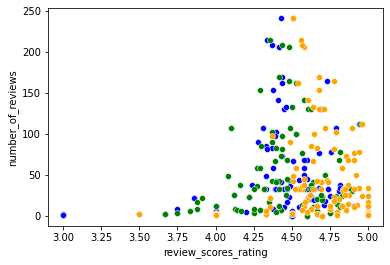

In [246]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = shared_roomBar)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = shared_roomBar)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = shared_roomBar)

In [247]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepBar = shared_roomBar[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepBar = shared_roomBar["number_of_reviews"]

In [248]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [249]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [250]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepBar, y = Var_DepBar)

LinearRegression()

In [251]:
model.score(Vars_IndepBar, Var_DepBar)

0.01592663953206208

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [252]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterBar = model.score(X=Vars_IndepBar, y = Var_DepBar)
coef_DeterBar

0.01592663953206208



*   Coeficientes de **Correlación**



In [253]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelBar = np.sqrt(coef_DeterBar)
coef_CorrelBar

0.1262007905365972

### Definición del **DF** Londres

In [254]:
dfLon = pd.read_csv("listingsLon.csv.gz")

In [255]:
dfLon["host_acceptance_rate"] = dfLon["host_acceptance_rate"].str.replace("%","")
dfLon["price"] = dfLon["price"].str.replace("$","")
dfLon["price"] = dfLon["price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


El objetivo del estudio es obtener un modelo matemático de regresión que describa y prediga el comportamiento de nuestros datos, por lo que es importante que nuestra DF se reduzca a únicamente las variables que nos pueden ser útiles para dicho objetivo (variables numéricas). 

In [256]:
dfLon = dfLon.loc[:, ['room_type', 'number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
dfroomLon = dfLon.loc[:,["room_type"]]
dfLon.head(5)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,30,70,50.00,343,4.90,4.89,4.93
1,Entire home/apt,89,29,75.00,70,4.79,4.88,4.82
2,Entire home/apt,42,67,90.00,222,4.32,4.03,4.86
3,Private room,65,73,55.00,74,4.84,4.71,4.93
4,Entire home/apt,51,87,379.00,249,4.74,4.69,4.69


In [257]:
dfLon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    69351 non-null  object 
 1   number_of_reviews            69351 non-null  int64  
 2   host_acceptance_rate         45090 non-null  object 
 3   price                        69351 non-null  object 
 4   availability_365             69351 non-null  int64  
 5   review_scores_rating         52571 non-null  float64
 6   review_scores_cleanliness    51562 non-null  float64
 7   review_scores_communication  51548 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.2+ MB


In [258]:
# Al notar que tenemos dos columnas cómo "object", las transformamos a numéricas
dfLon["host_acceptance_rate"] = pd.to_numeric(dfLon["host_acceptance_rate"], downcast = "float")
dfLon["price"] = pd.to_numeric(dfLon["price"], downcast = "float")

### Tratamiento de **valores nulos** y **outliers**


*   Valores Nulos



In [259]:
valores_nulos = dfLon.isnull().sum()
valores_nulos

room_type                          0
number_of_reviews                  0
host_acceptance_rate           24261
price                              0
availability_365                   0
review_scores_rating           16780
review_scores_cleanliness      17789
review_scores_communication    17803
dtype: int64

Cómo se puede observar, 4 de nuestras variables cuentan con una cantidad significante de valores nulos, por lo que eliminarlos no es una opción tan recomendada, porque estaríamos reduciendo basatnte nuestra cantidad de datos. Entonces procedemos a imputar estos valores nulos mediante la técnica de **imputar con el promedio**.

In [260]:
dfLon = dfLon.fillna(round(dfLon.mean(),1))
dfLon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,30,70.0,50.0,343,4.90,4.89,4.93
1,Entire home/apt,89,29.0,75.0,70,4.79,4.88,4.82
2,Entire home/apt,42,67.0,90.0,222,4.32,4.03,4.86
3,Private room,65,73.0,55.0,74,4.84,4.71,4.93
4,Entire home/apt,51,87.0,379.0,249,4.74,4.69,4.69


In [261]:
# Corroboramos los valores nulos
valores_nulos = dfLon.isnull().sum()
valores_nulos

room_type                      0
number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
dtype: int64



*   Outliers



In [262]:
# Aplicando la desviación estándar para encontrar los límites
y = dfLon

LSuperior = y.mean() + 3*y.std()
LInferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n", LSuperior)
print("Límite inferior permitido:\n", LInferior)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Límite superior permitido:
 number_of_reviews               138.769340
host_acceptance_rate            144.857708
price                          1415.677887
availability_365                506.983531
review_scores_rating              6.708687
review_scores_cleanliness         6.073833
review_scores_communication       5.976427
dtype: float64
Límite inferior permitido:
 number_of_reviews              -103.695238
host_acceptance_rate             19.738651
price                         -1061.260284
availability_365               -289.942998
review_scores_rating              2.457732
review_scores_cleanliness         3.158713
review_scores_communication       3.628774
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [263]:
dfLon = dfLon[(y<=LSuperior)&(y>=LInferior)]
dfLon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,NaN,30.0,70.0,50.0,343,4.90,4.89,4.93
1,NaN,89.0,29.0,75.0,70,4.79,4.88,4.82
2,NaN,42.0,67.0,90.0,222,4.32,4.03,4.86
3,NaN,65.0,73.0,55.0,74,4.84,4.71,4.93
4,NaN,51.0,87.0,379.0,249,4.74,4.69,4.69


In [264]:
valores_nulos = dfLon.isnull().sum()
valores_nulos

room_type                      69351
number_of_reviews               1478
host_acceptance_rate            2205
price                           1004
availability_365                   0
review_scores_rating            1501
review_scores_cleanliness       1628
review_scores_communication     1177
dtype: int64

In [265]:
# Rescatamos la columna "room_type" que habíamos salvado anteriormente
dfLon["room_type"] = dfroomLon["room_type"]

In [266]:
# Imputamos los nulos que resultaron outliers, usando mean
dfLon = dfLon.fillna(round(dfLon.mean(),1))
dfLon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,30.0,70.0,50.0,343,4.90,4.89,4.93
1,Entire home/apt,89.0,29.0,75.0,70,4.79,4.88,4.82
2,Entire home/apt,42.0,67.0,90.0,222,4.32,4.03,4.86
3,Private room,65.0,73.0,55.0,74,4.84,4.71,4.93
4,Entire home/apt,51.0,87.0,379.0,249,4.74,4.69,4.69


In [267]:
dfLon.describe()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
count,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,13.025133,84.923882,144.810577,108.520266,4.674968,4.671697,4.842148
std,21.953471,14.963346,152.245392,132.821088,0.339252,0.309313,0.208144
min,0.000000,20.000000,0.000000,0.000000,2.500000,3.170000,3.630000
25%,1.000000,82.300003,55.000000,0.000000,4.600000,4.600000,4.800000
50%,4.000000,82.300003,100.000000,32.000000,4.690000,4.670000,4.870000
75%,14.000000,98.000000,173.000000,228.000000,4.960000,4.950000,5.000000
max,138.000000,100.000000,1414.000000,365.000000,5.000000,5.000000,5.000000


¡Nuestra base de datos está lista para ser utilizada!

### Separamos el DF para tener un DF para cada **Tipo de cuarto**

In [270]:
# Filtro por room (Entire home)
entire_homeLon = dfLon[dfLon["room_type"] == "Entire home/apt"]
entire_homeLon.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
1,Entire home/apt,89.0,29.0,75.0,70,4.79,4.88,4.82
2,Entire home/apt,42.0,67.0,90.0,222,4.32,4.03,4.86
4,Entire home/apt,51.0,87.0,379.0,249,4.74,4.69,4.69


In [273]:
# Filtro por room (Private room)
private_roomLon = dfLon[dfLon["room_type"] == "Private room"]
private_roomLon.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Private room,30.0,70.0,50.0,343,4.90,4.89,4.93
3,Private room,65.0,73.0,55.0,74,4.84,4.71,4.93
5,Private room,13.0,99.0,180.0,236,4.80,4.88,4.83


In [274]:
# Filtro por room (Shared room)
shared_roomLon = dfLon[dfLon["room_type"] == "Shared room"]
shared_roomLon.head(3)

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
199,Shared room,0.0,82.300003,50.0,365,4.60,4.60,4.80
391,Shared room,50.0,84.900002,23.0,314,4.54,4.65,4.92
989,Shared room,91.0,92.000000,39.0,1,4.89,4.90,4.89


### Data Frame **Entire home/apt** Barcelona

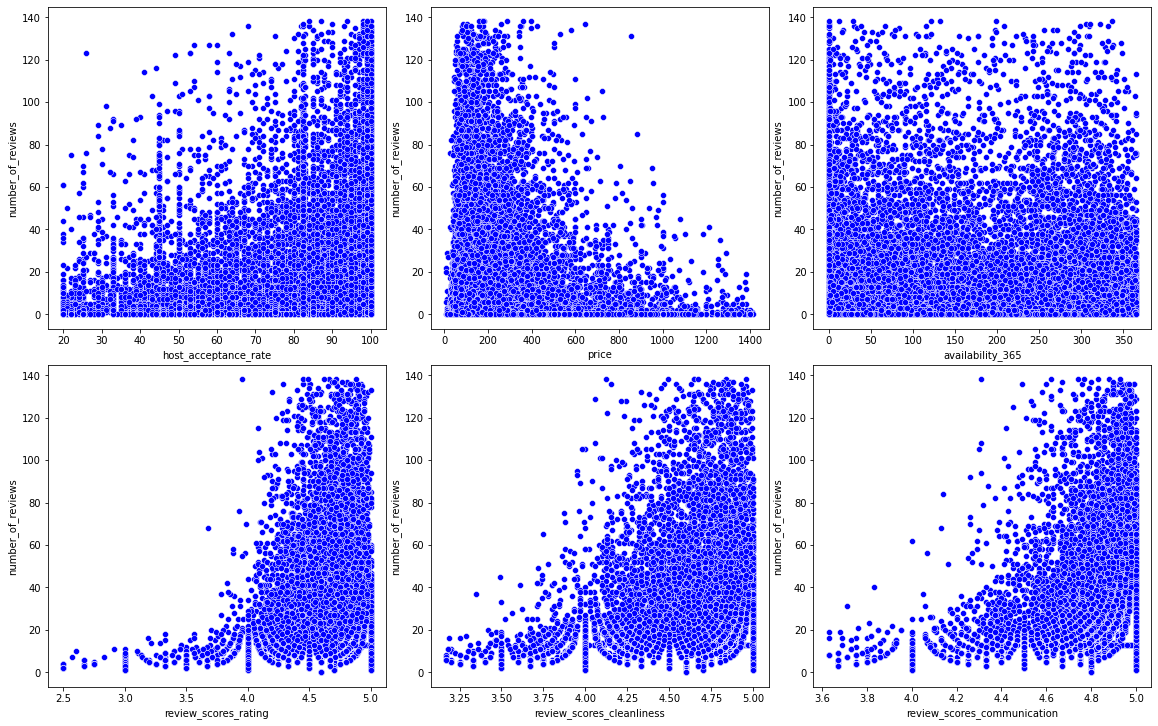

In [275]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = entire_homeLon.loc[:,column_sels]
y = entire_homeLon['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=entire_homeLon, ax=axs[i], color='blue')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [276]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_ehLon = abs(entire_homeLon.corr())
Corr_Factors_ehLon

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.059700,0.039159,0.024704,0.062176,0.045225,0.037136
host_acceptance_rate,0.059700,1.000000,0.079175,0.023828,0.061216,0.006803,0.066330
price,0.039159,0.079175,1.000000,0.242763,0.003294,0.029541,0.053127
availability_365,0.024704,0.023828,0.242763,1.000000,0.092224,0.047233,0.112036
review_scores_rating,0.062176,0.061216,0.003294,0.092224,1.000000,0.561925,0.530078
review_scores_cleanliness,0.045225,0.006803,0.029541,0.047233,0.561925,1.000000,0.387871
review_scores_communication,0.037136,0.066330,0.053127,0.112036,0.530078,0.387871,1.000000


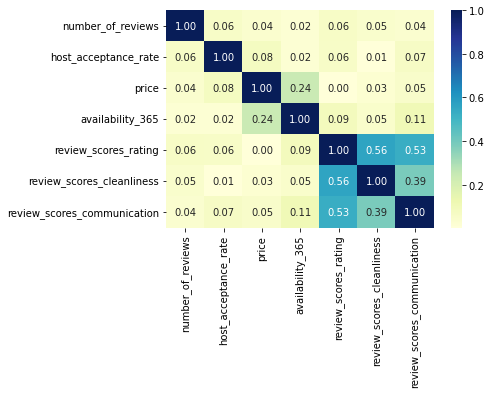

In [277]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_ehLon, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

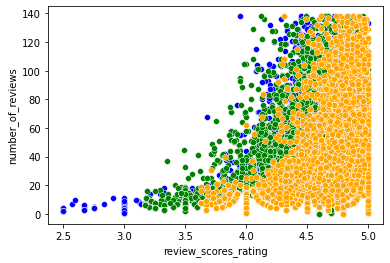

In [278]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = entire_homeLon)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = entire_homeLon)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = entire_homeLon)

In [279]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepLon = entire_homeLon[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepLon = entire_homeLon["number_of_reviews"]

In [280]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [281]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [282]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepLon, y = Var_DepLon)

LinearRegression()

In [283]:
model.score(Vars_IndepLon, Var_DepLon)

0.004031778510622419

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [284]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterLon = model.score(X=Vars_IndepLon, y = Var_DepLon)
coef_DeterLon

0.004031778510622419



*   Coeficientes de **Correlación**



In [285]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelLon = np.sqrt(coef_DeterLon)
coef_CorrelLon

0.06349628737668384

### Data Frame **Private room** Barcelona

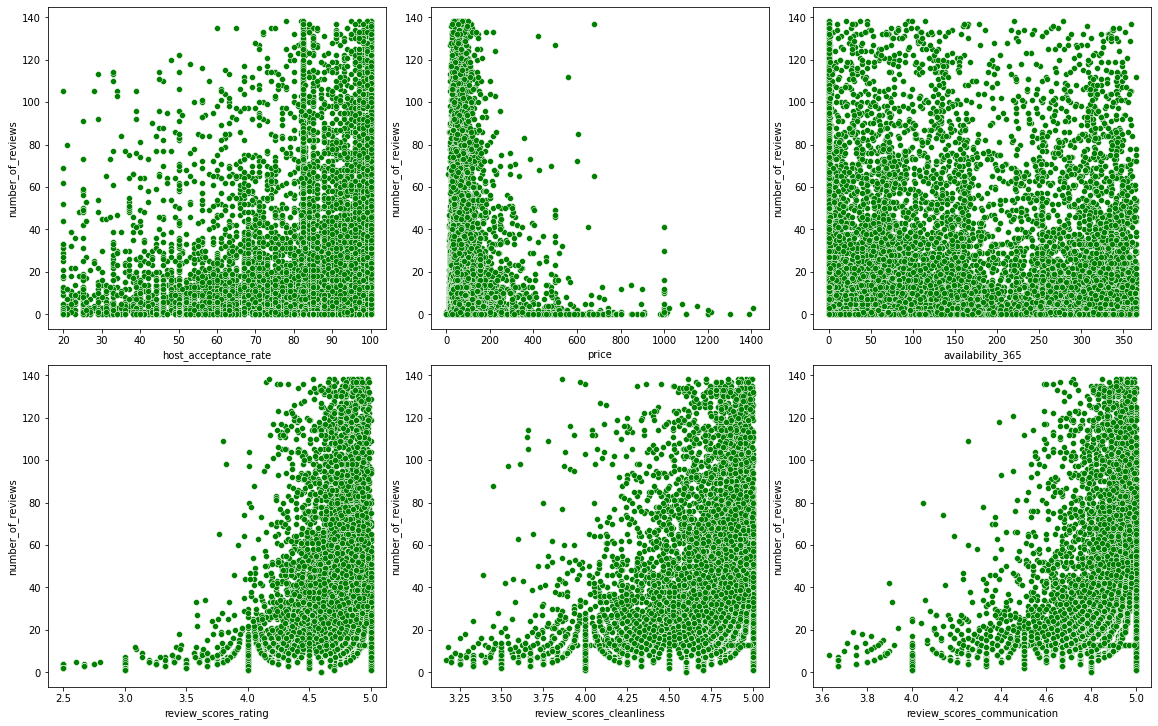

In [286]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = private_roomLon.loc[:,column_sels]
y = private_roomLon['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=private_roomLon, ax=axs[i], color='green')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [287]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_prLon = abs(private_roomLon.corr())
Corr_Factors_prLon

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.123010,0.048776,0.068150,0.130233,0.118255,0.098212
host_acceptance_rate,0.123010,1.000000,0.058079,0.057536,0.030383,0.007019,0.032933
price,0.048776,0.058079,1.000000,0.233351,0.052580,0.010105,0.064704
availability_365,0.068150,0.057536,0.233351,1.000000,0.039392,0.010391,0.075318
review_scores_rating,0.130233,0.030383,0.052580,0.039392,1.000000,0.564376,0.546484
review_scores_cleanliness,0.118255,0.007019,0.010105,0.010391,0.564376,1.000000,0.444364
review_scores_communication,0.098212,0.032933,0.064704,0.075318,0.546484,0.444364,1.000000


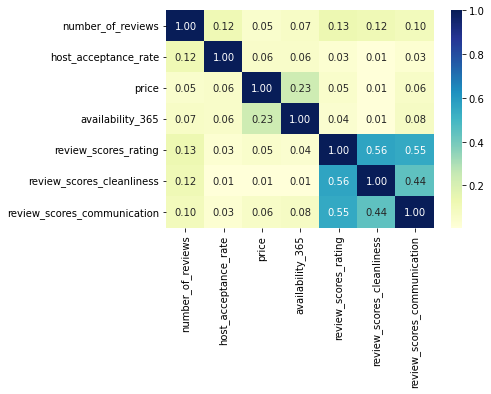

In [288]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_prLon, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

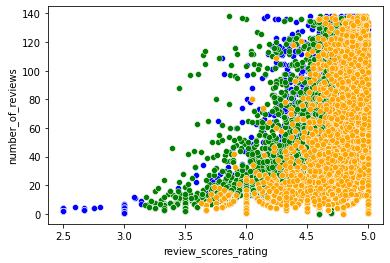

In [289]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = private_roomLon)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = private_roomLon)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = private_roomLon)

In [290]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepLon = private_roomLon[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepLon = private_roomLon["number_of_reviews"]

In [291]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [292]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [293]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepLon, y = Var_DepLon)

LinearRegression()

In [294]:
model.score(Vars_IndepLon, Var_DepLon)

0.020386395804224633

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [295]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterLon = model.score(X=Vars_IndepLon, y = Var_DepLon)
coef_DeterLon

0.020386395804224633



*   Coeficientes de **Correlación**



In [296]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelLon = np.sqrt(coef_DeterLon)
coef_CorrelLon

0.14278093641738254

### Data Frame **Shared room** Barcelona

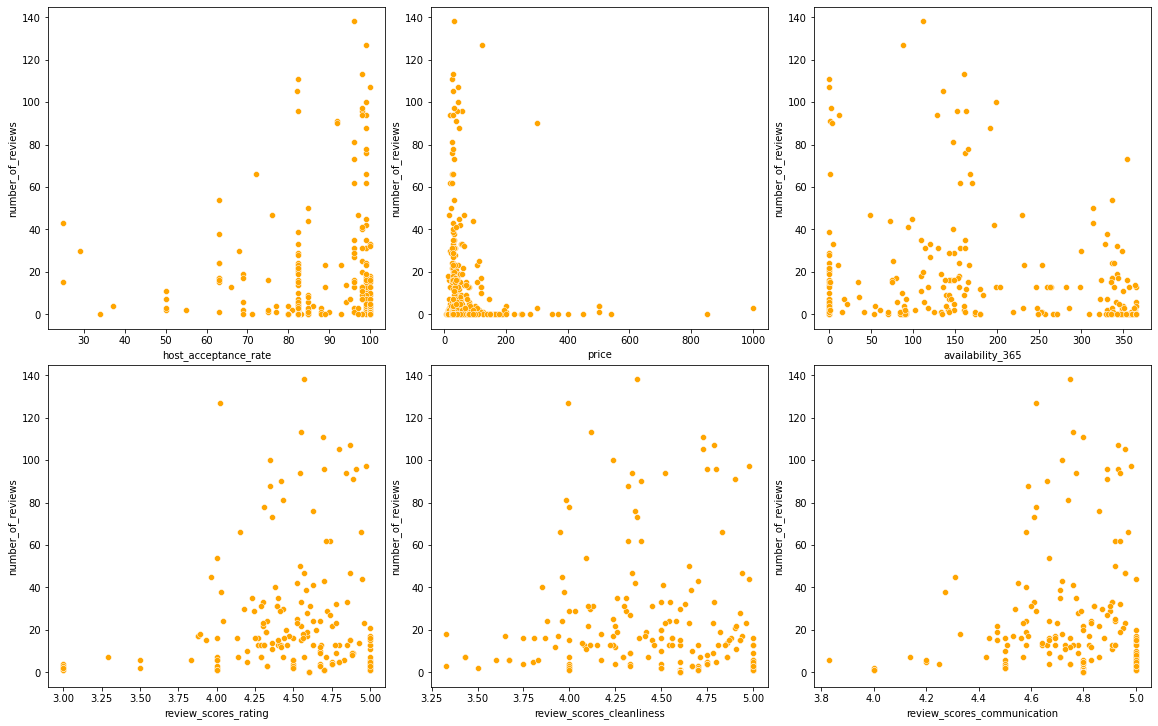

In [297]:
from turtle import color
column_sels = ['host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared_roomLon.loc[:,column_sels]
y = shared_roomLon['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=shared_roomLon, ax=axs[i], color='orange')
plt.tight_layout(pad=0.4)

Despues de analizar los gráficos de dispersión, y observar que probablemente los coeficientes de correlación entre las variables serán muy bajos, ahora construiremos nuestra tabla y gráfico de correlación donde podemos observar numéricamente cuál es **la variable con mayor correlación con number of reviews.**

In [298]:
# Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors_srLon = abs(shared_roomLon.corr())
Corr_Factors_srLon

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.183372,0.098988,0.011157,0.053705,0.182517,0.061313
host_acceptance_rate,0.183372,1.000000,0.027382,0.022160,0.023937,0.080420,0.054044
price,0.098988,0.027382,1.000000,0.123122,0.027941,0.039652,0.051058
availability_365,0.011157,0.022160,0.123122,1.000000,0.027584,0.129963,0.012125
review_scores_rating,0.053705,0.023937,0.027941,0.027584,1.000000,0.573103,0.494306
review_scores_cleanliness,0.182517,0.080420,0.039652,0.129963,0.573103,1.000000,0.534150
review_scores_communication,0.061313,0.054044,0.051058,0.012125,0.494306,0.534150,1.000000


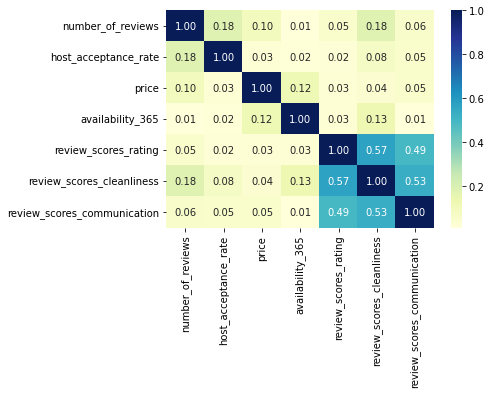

In [299]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors_srLon, cmap= "YlGnBu", annot = True, fmt=".2f")
Heat_Map


**Modelo matemático** de regresión lineal múltiple que mejor describe el número de reseñas, utilizando la **variable de mayor correlación.** 

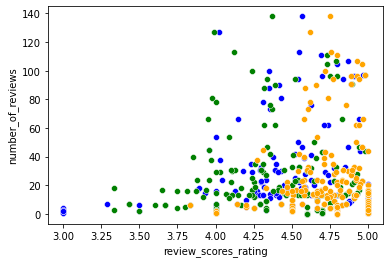

In [300]:
from turtle import color

sns.scatterplot(x = "review_scores_rating", y = "number_of_reviews", color = "blue", data = shared_roomLon)
sns.scatterplot(x = "review_scores_cleanliness", y = "number_of_reviews", color = "green", data = shared_roomLon)
sns.scatterplot(x = "review_scores_communication", y = "number_of_reviews", color = "orange", data = shared_roomLon)

In [301]:
# Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_IndepLon = shared_roomLon[["review_scores_rating","review_scores_cleanliness","review_scores_communication"]]
Var_DepLon = shared_roomLon["number_of_reviews"]

In [302]:
# Se definde model como la funcion de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [303]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [304]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepLon, y = Var_DepLon)

LinearRegression()

In [305]:
model.score(Vars_IndepLon, Var_DepLon)

0.0378954558828517

### Coeficientes de **Determinación** y de **Correlación** de nuestro modelo





*   Coeficientes de **Determinación**



In [306]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterLon = model.score(X=Vars_IndepLon, y = Var_DepLon)
coef_DeterLon

0.0378954558828517



*   Coeficientes de **Correlación**



In [307]:
# Corroboramos cual es el coeficiente de correlacion de nuestro modelo 
coef_CorrelLon = np.sqrt(coef_DeterLon)
coef_CorrelLon

0.19466755220850676